In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kendalltau

# **Relación ORO-BRENT**

El objetivo principal de este trabajo es analizar la relación entre los precios del oro y del petróleo Brent para determinar si existe una correlación significativa entre ellos. Muchas personas sostienen que estos dos activos están correlacionados de alguna manera, y este análisis busca examinar y cuantificar esa relación. 

En este trabajo, exploraremos y analizaremos la posible correlación entre los precios del oro y del petróleo Brent.

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2004-01-05  415.700012  422.500000  422.500000  424.399994  424.399994      20
2004-01-06  424.399994  424.299988  424.299988  422.799988  422.799988      20
2004-01-07  423.000000  423.000000  423.000000  421.899994  421.899994      20
2004-01-08  421.899994  422.000000  422.000000  424.000000  424.000000      20
2004-01-09  424.000000  423.899994  423.899994  426.399994  426.399994      20
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-12-22  2055.699951  2068.699951  2052.199951  2057.100098  2057.100098   
2023-12-26  2060.000000  2060.800049  2054.199951  2058.199951  2058.199951   
2023-12-27  2067.300049  2081.899902  2064.800049  2081.899902  2081.899902   
2023-12-28  2081.600098  2087.300049  2066.500000  2

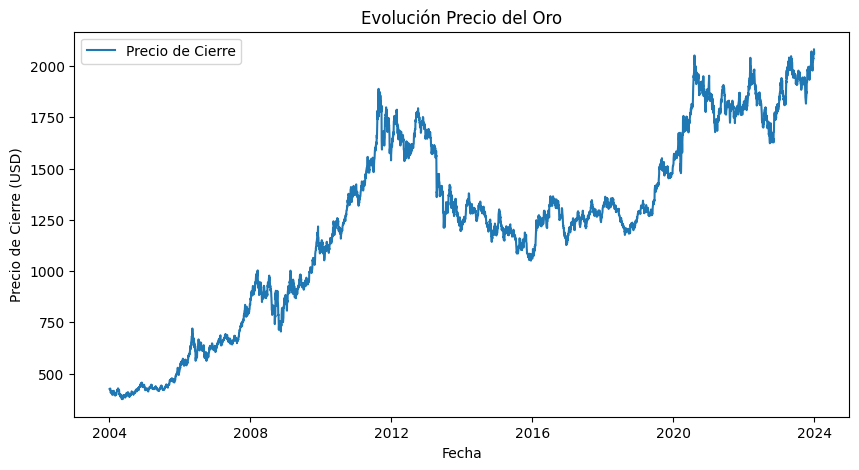

In [3]:
ticker = 'GC=F'
start_date = '2004-01-01'
end_date = '2024-01-01'
GCF_0 = yf.download(ticker, start=start_date, end=end_date)

print(GCF_0.head())
print(GCF_0.tail())

mean_price = np.mean(GCF_0['Close'])
median_price = np.median(GCF_0['Close'])
std_dev = np.std(GCF_0['Close'])

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")

# Visualización de Datos
plt.figure(figsize=(10, 5))
sns.lineplot(data=GCF_0['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2007-07-30  75.849998  76.529999  75.440002  75.739998  75.739998    2575
2007-07-31  75.699997  77.169998  75.669998  77.050003  77.050003    3513
2007-08-01  77.000000  77.059998  74.860001  75.349998  75.349998    3930
2007-08-02  75.220001  76.209999  74.269997  75.760002  75.760002    6180
2007-08-03  75.389999  76.000000  74.529999  74.750000  74.750000    4387
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-12-22  79.440002  80.370003  78.830002  79.070000  79.070000   12334
2023-12-26  79.190002  81.709999  78.809998  81.070000  81.070000   10247
2023-12-27  80.739998  81.320000  79.489998  79.650002  79.650002    8282
2023-12-28  79.839996  79.959999  78.339996  78.389999  78.389999   24301
2023-12-29  77.419998  77.970001  76.7

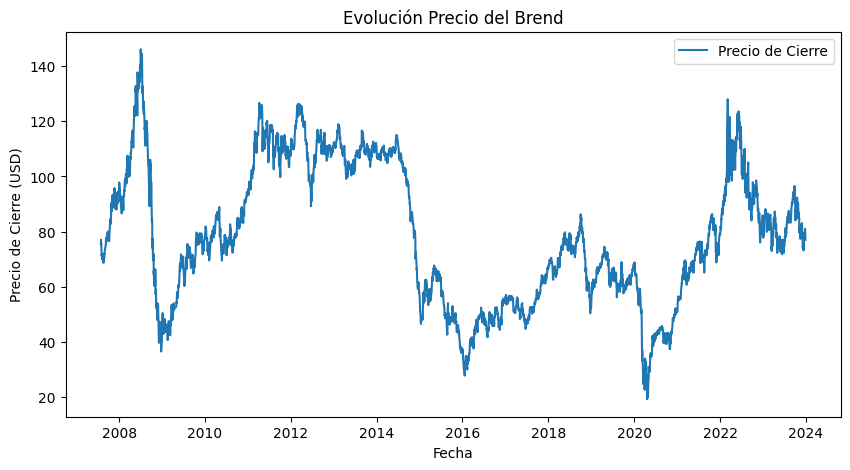

In [4]:
ticker = 'BZ=F'
start_date = '2004-01-01'
end_date = '2024-01-01'
BZF_0 = yf.download(ticker, start=start_date, end=end_date)

print(BZF_0.head())
print(BZF_0.tail())

mean_price = np.mean(BZF_0['Close'])
median_price = np.median(BZF_0['Close'])
std_dev = np.std(BZF_0['Close'])

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")

# Visualización de Datos
plt.figure(figsize=(10, 5))
sns.lineplot(data=BZF_0['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Brend')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

In [5]:
# Calcular los rendimientos continuos para el precio del Brent
BZF_0['Brent Returns'] = np.log(BZF_0['Close'] / BZF_0['Close'].shift(1))

mean_price = np.mean(BZF_0['Close'])
median_price = np.median(BZF_0['Close'])
std_dev = np.std(BZF_0['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')

Mean Price: 78.58151126446036
Median Price: 76.17499923706055
Standard Deviation: 25.034741107185862
Volatilidad: 5.003472904611942


In [6]:
# Calcular los rendimientos continuos para el precio del Oro
GCF_0['Gold Returns'] = np.log(GCF_0['Close'] / GCF_0['Close'].shift(1))

mean_price = np.mean(GCF_0['Close'])
median_price = np.median(GCF_0['Close'])
std_dev = np.std(GCF_0['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')

Mean Price: 1240.1980091872488
Median Price: 1269.25
Standard Deviation: 453.0918260176287
Volatilidad: 21.285953725817144


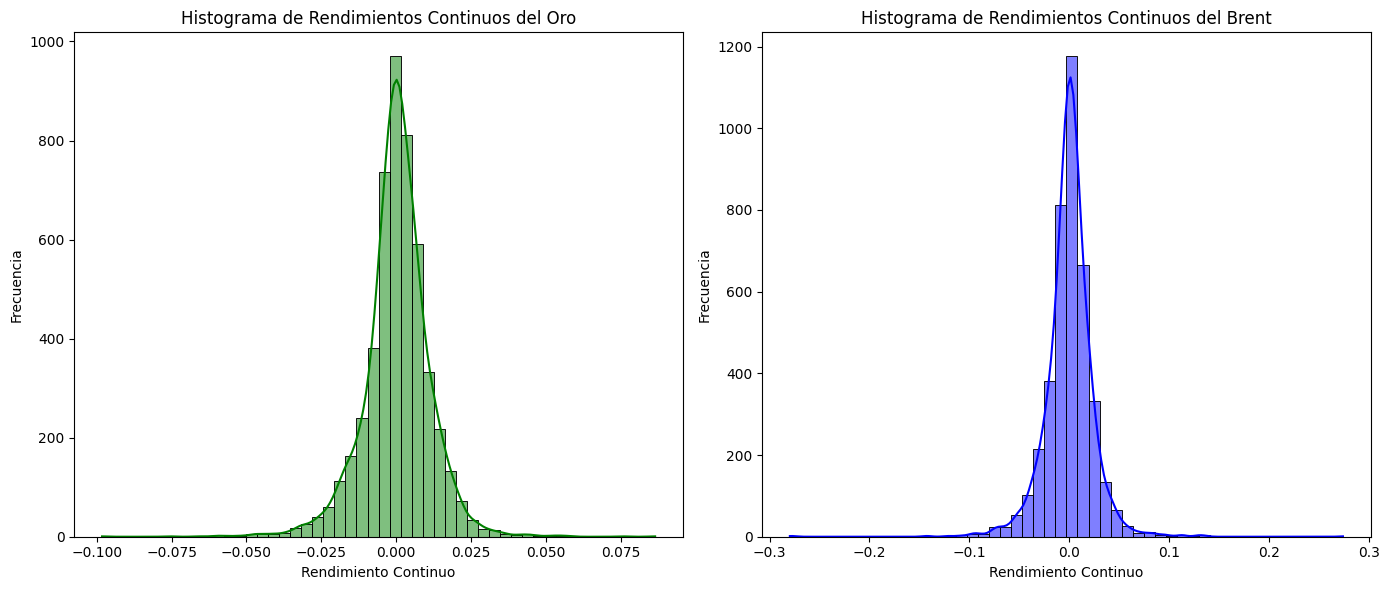

Análisis estadístico descriptivo:
       Gold Returns  Brent Returns
count   5023.000000    4075.000000
mean       0.000315       0.000004
std        0.011179       0.024446
min       -0.098206      -0.279761
25%       -0.004915      -0.010337
50%        0.000449       0.000537
75%        0.006199       0.011348
max        0.086432       0.274191


In [7]:
# Concatenar los rendimientos continuos del oro y del Brent en un solo DataFrame
returns_df = pd.concat([GCF_0['Gold Returns'], BZF_0['Brent Returns']], axis=1)
returns_df.columns = ['Gold Returns', 'Brent Returns']

# Calcular estadísticas descriptivas
descriptive_stats = returns_df.describe()

# Crear dos figuras separadas para los histogramas
plt.figure(figsize=(14, 6))

# Histograma de los rendimientos continuos del oro
plt.subplot(1, 2, 1)
sns.histplot(data=GCF_0['Gold Returns'], bins=50, color='green', kde=True)
plt.title('Histograma de Rendimientos Continuos del Oro')
plt.xlabel('Rendimiento Continuo')
plt.ylabel('Frecuencia')

# Histograma de los rendimientos continuos del Brent
plt.subplot(1, 2, 2)
sns.histplot(data=BZF_0['Brent Returns'], bins=50, color='blue', kde=True)
plt.title('Histograma de Rendimientos Continuos del Brent')
plt.xlabel('Rendimiento Continuo')
plt.ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los histogramas
plt.show()

# Mostrar el análisis estadístico descriptivo
print("Análisis estadístico descriptivo:")
print(descriptive_stats)

Correlación entre los rendimientos continuos del oro y del Brent:
               Gold Returns  Brent Returns
Gold Returns       1.000000       0.188915
Brent Returns      0.188915       1.000000


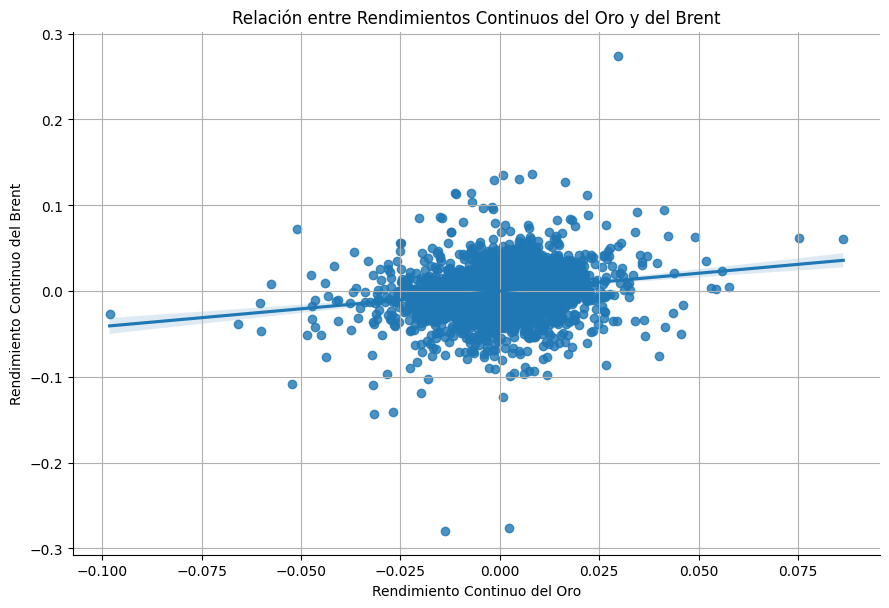

In [8]:
# Calcular la correlación entre los rendimientos continuos del oro y del Brent
correlation = returns_df.corr()
print("Correlación entre los rendimientos continuos del oro y del Brent:")
print(correlation)

# Visualizar la relación entre los rendimientos continuos del oro y del Brent con una línea de regresión
sns.lmplot(x='Gold Returns', y='Brent Returns', data=returns_df, height=6, aspect=1.5)
plt.title('Relación entre Rendimientos Continuos del Oro y del Brent')
plt.xlabel('Rendimiento Continuo del Oro')
plt.ylabel('Rendimiento Continuo del Brent')
plt.grid(True)
plt.show()

# **Conclusiones**

Los datos muestran una correlación positiva moderada de 0.1889 entre los rendimientos continuos del oro y del petróleo Brent. Esto indica que hay cierta relación entre los movimientos de precios de estos dos activos, aunque no es particularmente fuerte.

La desviación estándar de 2.4448% para el petróleo Brent indica una mayor volatilidad en comparación con el oro, cuya desviación estándar es de 1.1179%. Esto significa que los retornos del petróleo Brent tienden a experimentar fluctuaciones más amplias en relación con su media en comparación con los retornos del oro. Esta mayor volatilidad puede representar un nivel de riesgo más alto para los inversores que operan en el mercado del petróleo Brent en comparación con el mercado del oro.

He observado una leve correlación positiva entre el petróleo Brent y el oro durante estos últimos 20 años. En lugar de considerar este periodo, voy a enfocarme en momentos específicos de recesión económica, como la crisis financiera de 2008 (a partir del mes de septiembre con la caída de Lehman Brothers). Analizaré cómo se comportan estos dos activos durante estos períodos de contracción económica significativa para comprender mejor su relación.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


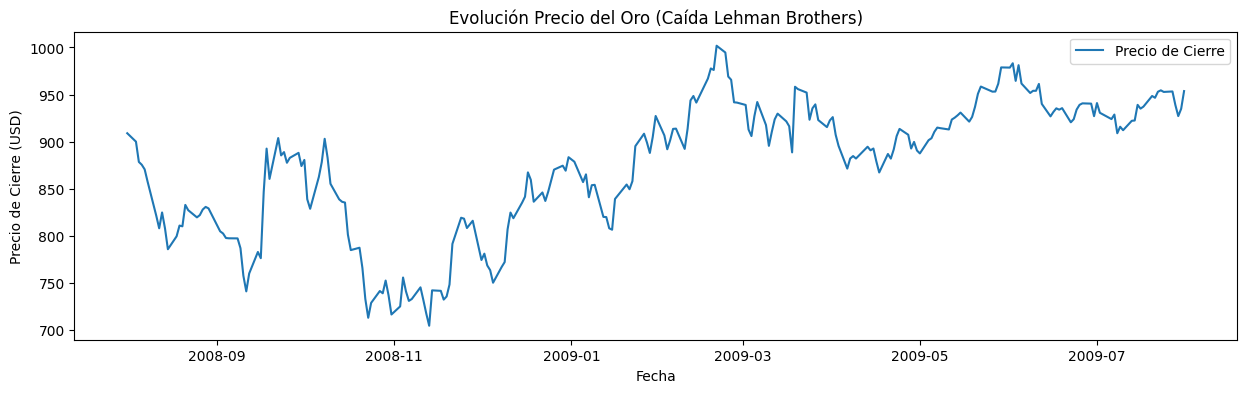

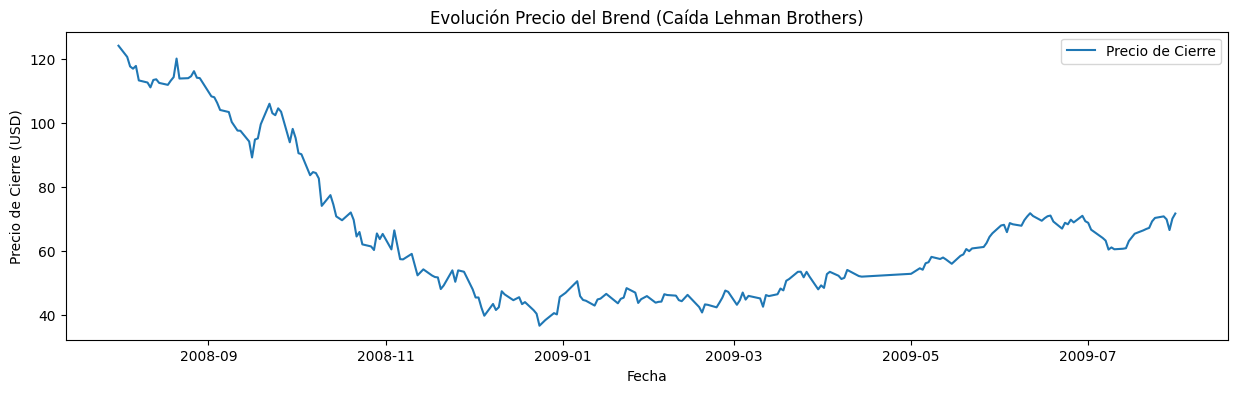

In [20]:
ticker = 'GC=F'
start_date = '2008-08-01'
end_date = '2009-08-01'
GCF_1 = yf.download(ticker, start=start_date, end=end_date)

ticker = 'BZ=F'
start_date = '2008-08-01'
end_date = '2009-08-01'
BZF_1 = yf.download(ticker, start=start_date, end=end_date)


plt.figure(figsize=(15, 4))
sns.lineplot(data=GCF_1['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Oro (Caída Lehman Brothers)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 4))
sns.lineplot(data=BZF_1['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Brend (Caída Lehman Brothers)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()


In [21]:
# Calcular los rendimientos continuos para el precio del Brent
BZF_1['Brent Returns'] = np.log(BZF_1['Close'] / BZF_1['Close'].shift(1))

mean_price = np.mean(BZF_1['Close'])
median_price = np.median(BZF_1['Close'])
std_dev = np.std(BZF_1['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')


Mean Price: 65.53416305345527
Median Price: 59.93000030517578
Standard Deviation: 22.82542606344511
Volatilidad: 4.777596264173555


In [22]:
# Calcular los rendimientos continuos para el precio del Oro
GCF_1['Gold Returns'] = np.log(GCF_1['Close'] / GCF_1['Close'].shift(1))

mean_price = np.mean(GCF_1['Close'])
median_price = np.median(GCF_1['Close'])
std_dev = np.std(GCF_1['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')


Mean Price: 873.3329353938027
Median Price: 889.8500061035156
Standard Deviation: 70.04246655665416
Volatilidad: 8.369137742722016


Correlación entre los rendimientos continuos del oro y del Brent:
               Gold Returns  Brent Returns
Gold Returns       1.000000       0.300589
Brent Returns      0.300589       1.000000


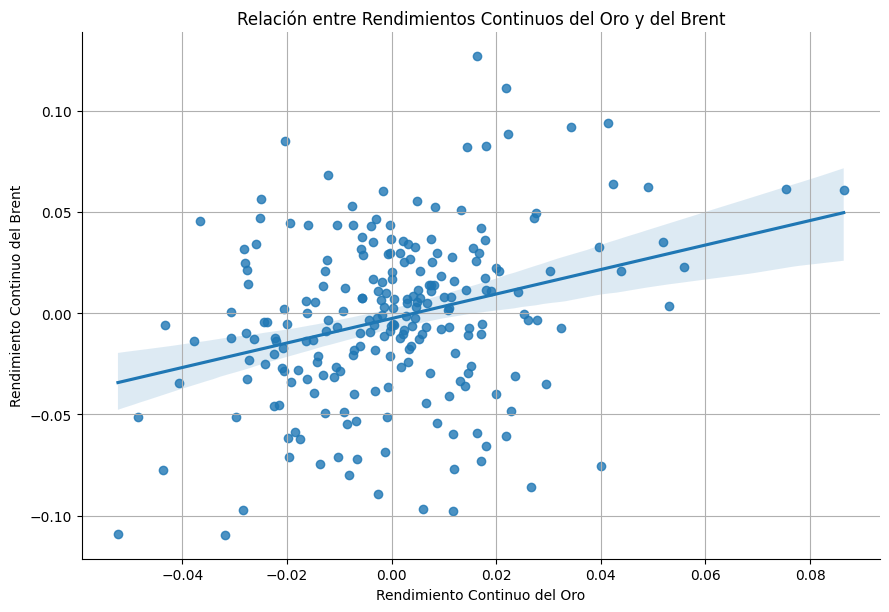

In [23]:
# Concatenar los rendimientos continuos del oro y del Brent en un solo DataFrame
returns_df1 = pd.concat([GCF_1['Gold Returns'], BZF_1['Brent Returns']], axis=1)
returns_df1.columns = ['Gold Returns', 'Brent Returns']

# Calcular la correlación entre los rendimientos continuos del oro y del Brent
correlation = returns_df1.corr()
print("Correlación entre los rendimientos continuos del oro y del Brent:")
print(correlation)

# Visualizar la relación entre los rendimientos continuos del oro y del Brent con una línea de regresión
sns.lmplot(x='Gold Returns', y='Brent Returns', data=returns_df1, height=6, aspect=1.5)
plt.title('Relación entre Rendimientos Continuos del Oro y del Brent')
plt.xlabel('Rendimiento Continuo del Oro')
plt.ylabel('Rendimiento Continuo del Brent')
plt.grid(True)
plt.show()

He observado que la correlación entre el brent y el oro, el periodos de recesión, aumenta. Este aumento de la correlacion entre el oro y el Brent puede ser más fuerte durante las crisis económicas debido a la aversión al riesgo, las políticas monetarias expansivas, las fluctuaciones del dólar y las dinámicas especulativas del mercado. Estos factores contribuyen a que los precios del oro y del petróleo se muevan de manera más sincronizada en tiempos de incertidumbre económica. 

**¿Cómo afecta las fluctuaciones del dólar en la correlación entre el Brent y el Oro?**

El oro y el petróleo Brent se comercializan en dólares estadounidenses a nivel internacional. Las políticas monetarias y macroeconómicas en la eurozona y Estados Unidos tienen un papel crucial en el tipo de cambio EUR/USD, así como en los precios del oro y el petróleo. Por ejemplo, las decisiones sobre las tasas de interés, los estímulos económicos y los movimientos en los mercados financieros pueden impactar tanto en el tipo de cambio como en los precios de las materias primas. Las fluctuaciones en el tipo de cambio EUR/USD pueden influir en el comercio internacional y, en la demanda de productos básicos como el oro y el petróleo. Un euro más fuerte frente al dólar estadounidense puede encarecer los productos denominados en euros, como el petróleo Brent, para los compradores fuera de la eurozona. Por esta razón, vamos a analizar el periodo del inicio de la crisis del 2008 para ver como el dólar afecta a los dos activos y poder observar mejor su correlación. 

**¿Qué correlaciones queremos esperar?**

- **EUR/USD y petróleo**: Negativa. Cuando el EUR/USD sube (dólar débil), el precio del petróleo tiende a subir.
- **EUR/USD y oro**: Negativa. Cuando el EUR/USD sube (dólar débil), el precio del oro tiende a subir.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


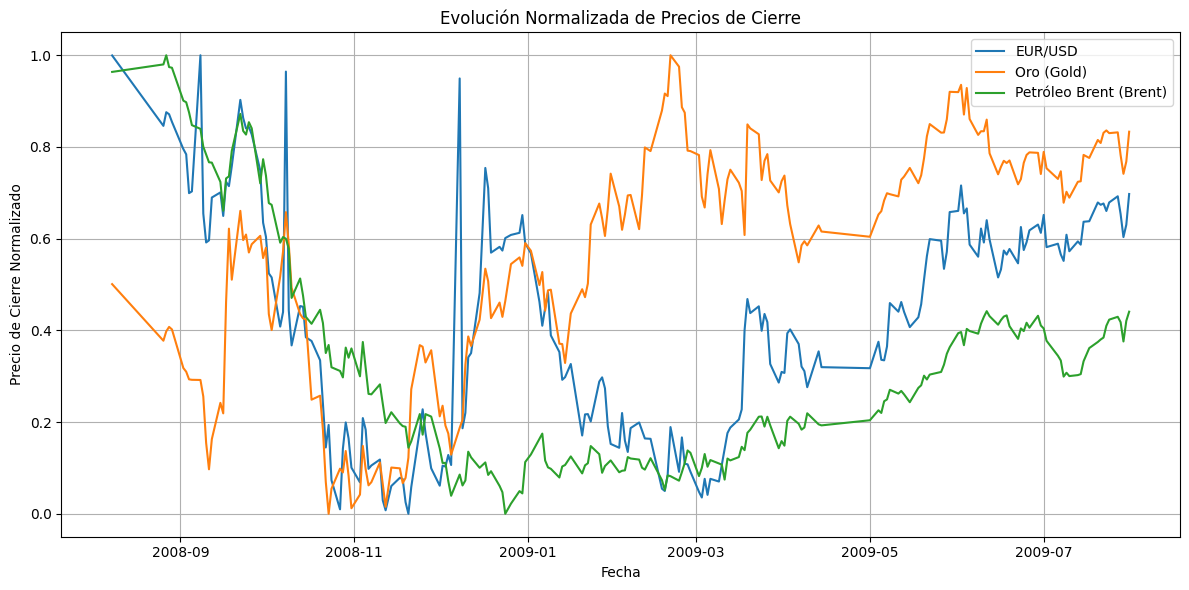

In [25]:
ticker = 'EURUSD=X'
start_date = '2008-08-01'
end_date = '2009-08-01'
EURUSD_3 = yf.download(ticker, start=start_date, end=end_date)

ticker = 'GC=F'
start_date = '2008-08-01'
end_date = '2009-08-01'
GCF_3 = yf.download(ticker, start=start_date, end=end_date)

ticker = 'BZ=F'
start_date = '2008-08-01'
end_date = '2009-08-01'
BZF_3 = yf.download(ticker, start=start_date, end=end_date)

# Asegurarnos de que las fechas de los datos coinciden
common_dates = EURUSD_3.index.intersection(GCF_3.index).intersection(BZF_3.index)
EURUSD_3 = EURUSD_3.loc[common_dates]
GCF_3 = GCF_3.loc[common_dates]
BZF_3 = BZF_3.loc[common_dates]

# Normalizar los precios de cierre
scaler = MinMaxScaler()

EURUSD_3['Normalized Close'] = scaler.fit_transform(EURUSD_3[['Close']])
GCF_3['Normalized Close'] = scaler.fit_transform(GCF_3[['Close']])
BZF_3['Normalized Close'] = scaler.fit_transform(BZF_3[['Close']])

# Crear un DataFrame con los datos normalizados
normalized_df = pd.DataFrame({
    'Fecha': common_dates,
    'EUR/USD': EURUSD_3['Normalized Close'],
    'Oro (Gold)': GCF_3['Normalized Close'],
    'Petróleo Brent (Brent)': BZF_3['Normalized Close']
}).set_index('Fecha')

# Graficar los precios normalizados
plt.figure(figsize=(12, 6))

# Gráfico de precios normalizados de cierre del EUR/USD
plt.plot(normalized_df.index, normalized_df['EUR/USD'], label='EUR/USD')

# Gráfico de precios normalizados de cierre del oro
plt.plot(normalized_df.index, normalized_df['Oro (Gold)'], label='Oro (Gold)')

# Gráfico de precios normalizados de cierre del petróleo Brent
plt.plot(normalized_df.index, normalized_df['Petróleo Brent (Brent)'], label='Petróleo Brent (Brent)')

plt.title('Evolución Normalizada de Precios de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Normalizado')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretación**: 

Fluctuaciones del EUR/USD: significa que el dólar estadounidense se está fortaleciendo en comparación con el euro. Por otro lado, cuando el par EUR/USD sube, indica que el euro se está fortaleciendo frente al dólar estadounidense, lo que implica que el dólar se está depreciando en relación con el euro.

Podemos observar que las correlaciones esperadas se cumplen en muchos periodos. Por ejemplo, de septiembre a octubre de 2008, cuando el dólar se fortaleció respecto al euro, el precio del oro y del Brent también bajaron. Por otro lado, de marzo a julio de 2009, ambos activos mostraron un comportamiento muy simétrico respecto al del dólar.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                 EUR/USD Returns  Gold Returns  Brent Returns
EUR/USD Returns          1.00000      0.266370       0.309260
Gold Returns             0.26637      1.000000       0.282408
Brent Returns            0.30926      0.282408       1.000000


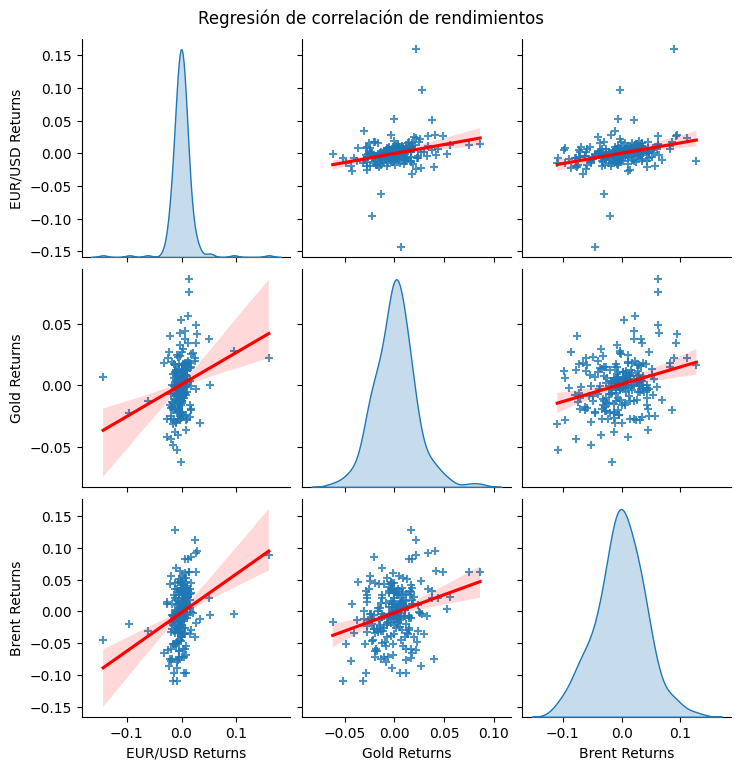

In [24]:
# Descargar los datos
ticker = 'EURUSD=X'
start_date = '2008-08-01'
end_date = '2009-08-01'
EURUSD_3 = yf.download(ticker, start=start_date, end=end_date)

ticker = 'GC=F'
start_date = '2008-08-01'
end_date = '2009-08-01'
GCF_3 = yf.download(ticker, start=start_date, end=end_date)

ticker = 'BZ=F'
start_date = '2008-01-01'
end_date = '2009-08-01'
BZF_3 = yf.download(ticker, start=start_date, end=end_date)

# Asegurarnos de que las fechas de los datos coinciden
common_dates = EURUSD_3.index.intersection(GCF_3.index).intersection(BZF_3.index)
EURUSD_3 = EURUSD_3.loc[common_dates]
GCF_3 = GCF_3.loc[common_dates]
BZF_3 = BZF_3.loc[common_dates]

# Calcular los rendimientos continuos
EURUSD_3['Returns'] = np.log(EURUSD_3['Close'] / EURUSD_3['Close'].shift(1))
GCF_3['Gold Returns'] = np.log(GCF_3['Close'] / GCF_3['Close'].shift(1))
BZF_3['Brent Returns'] = np.log(BZF_3['Close'] / BZF_3['Close'].shift(1))

# Crear un DataFrame con los rendimientos
returns_df3 = pd.DataFrame({
    'EUR/USD Returns': EURUSD_3['Returns'],
    'Gold Returns': GCF_3['Gold Returns'],
    'Brent Returns': BZF_3['Brent Returns']
}).dropna()

# Calcular la matriz de correlación
correlation_matrix = returns_df3.corr()
print(correlation_matrix)

# Graficar la matriz de correlación con regresión
sns.pairplot(returns_df3, kind='reg', diag_kind='kde', markers='+', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Regresión de correlación de rendimientos', y=1.02)
plt.show()


Como conclusión, durante el período analizado, las fluctuaciones del dólar no parecen haber aumentado la correlación entre los rendimientos del oro y del Brent. A pesar de que el dólar es la moneda principal en la que se cotizan el oro y el Brent, y juega un papel central en los mercados financieros globales, durante el período analizado, las fluctuaciones en el valor del dólar no parecen haber generado una correlación más fuerte entre los rendimientos de estas commodities. Aunque el dólar influye en los precios de commodities al ser la moneda de referencia, existen otros factores que también influyen en los mercados de oro y petróleo Brent.

Aunque el dólar es una variable importante a considerar al analizar los mercados de commodities, no es el único factor determinante de sus movimientos de precios. Otros factores, como la oferta y la demanda, la geopolítica, los cambios en la producción y la tecnología, así como las condiciones económicas y políticas a nivel global, también pueden desempeñar roles significativos en la determinación de los precios del oro y el petróleo Brent.